In [1]:
import pandas as pd

In [2]:
submission_stats = pd.read_csv("../../paper/data/submissions.csv", parse_dates=["created_at", "deleted_at"])
submission_stats.head()

,id,created_at,deleted_at,owner_id,competition_id
0,competition-prediction-04G1SWLb4C7M6FG3z1SuH,2025-02-24 21:55:26.406286+00:00,2025-03-17 16:00:00+00:00,5pgfnqQCrj8vtlYsVaX2G,competition-KbeK95EUdNeKULp32z8ij
1,competition-prediction-0ElQX3r1bGaqhj6boYpoL,2025-02-25 00:09:44.978338+00:00,2025-03-17 16:00:00+00:00,1a8Wi0Bjc2kyyokxlgahB,competition-KbeK95EUdNeKULp32z8ij
2,competition-prediction-0K8VeWSTfhsXVLtAQpM4d,2025-02-18 09:12:42.082694+00:00,2025-03-17 16:00:00+00:00,o2wBu1glbjmu3mDgrrgj5,competition-KbeK95EUdNeKULp32z8ij
3,competition-prediction-0KvVpX0qMpwn2sKjTzX5D,2025-03-13 21:55:21.942967+00:00,NaT,sxhvvx7ZXJnRp2k26eW1q,competition-2np7VaBJ3aZlRSho6iJsp
4,competition-prediction-0NvSmNhHEVTr9dYwNTJB9,2025-02-26 11:58:32.997249+00:00,NaT,t5ykWV1EAGumpxrTiD4EZ,competition-2np7VaBJ3aZlRSho6iJsp


In [3]:
# Remove deleted predictions
submission_stats = submission_stats[pd.isnull(submission_stats["deleted_at"])]

# Get the date
submission_stats["created_at_date"] = submission_stats["created_at"].dt.date

# Drop columns
submission_stats = submission_stats.drop(columns=["created_at", "deleted_at"])

submission_stats.head()

,id,owner_id,competition_id,created_at_date
3,competition-prediction-0KvVpX0qMpwn2sKjTzX5D,sxhvvx7ZXJnRp2k26eW1q,competition-2np7VaBJ3aZlRSho6iJsp,2025-03-13
4,competition-prediction-0NvSmNhHEVTr9dYwNTJB9,t5ykWV1EAGumpxrTiD4EZ,competition-2np7VaBJ3aZlRSho6iJsp,2025-02-26
6,competition-prediction-17gXzNQxcTxxissTDCTcD,cJ51pv3572hzCfm1AGosY,competition-KbeK95EUdNeKULp32z8ij,2025-03-11
7,competition-prediction-1BjuyNLZi4L7mQJg6wApt,NgbkxDCwWNBJAwcRGKNhV,competition-UkJQVGKUA7TMNwRHVp7nb,2025-03-06
8,competition-prediction-1MhGQMitUFqR2FcUhRllg,oVlb2up8Z8yyfmpEVcglB,competition-2np7VaBJ3aZlRSho6iJsp,2025-03-14


In [4]:
submission_counts = submission_stats.groupby("created_at_date").count()["id"].reset_index().rename(columns={"id": "count"})
submission_counts["Type"] = "Submissions to Polaris"
submission_counts.head()

,created_at_date,count,Type
0,2025-01-18,3,Submissions to Polaris
1,2025-01-20,2,Submissions to Polaris
2,2025-01-22,2,Submissions to Polaris
3,2025-01-23,4,Submissions to Polaris
4,2025-01-25,3,Submissions to Polaris


In [14]:
discord_stats = pd.read_csv("../../paper/data/discord.csv")

discord_stats["Timestamp"] = discord_stats["Date"]
discord_stats["created_at_date"] = discord_stats["Date"].apply(lambda s: s.split(",")[0])

discord_counts = discord_stats.groupby("created_at_date").count()["Username"].reset_index().rename(columns={"Username": "count"})
discord_counts["created_at_date"] = pd.to_datetime(discord_counts["created_at_date"]).dt.date
discord_counts["Type"] = "Discord Server activity"
discord_counts.head()

,created_at_date,count,Type
0,2024-12-03,3,Discord Server activity
1,2024-12-08,4,Discord Server activity
2,2025-01-03,2,Discord Server activity
3,2025-01-09,3,Discord Server activity
4,2025-01-10,2,Discord Server activity


In [15]:
from datetime import date, timedelta


def daterange(start_date: date, end_date: date):
    days = int((end_date - start_date).days)
    for n in range(days):
        yield start_date + timedelta(n)


start_date = date(2024, 12, 1)
end_date = date(2025, 4, 16)

In [16]:
unique_submission_dates = submission_counts["created_at_date"].unique()
unique_discord_dates = discord_counts["created_at_date"].unique()

for single_date in daterange(start_date, end_date):
    if single_date not in unique_submission_dates: 
        submission_counts.loc[len(submission_counts)] = [single_date, 0, "Submissions to Polaris"]
    if single_date not in unique_discord_dates: 
        discord_counts.loc[len(discord_counts)] = [single_date, 0, "Discord Server activity"]

submission_counts = submission_counts.sort_values(by="created_at_date")
discord_counts = discord_counts.sort_values(by="created_at_date")

In [17]:
submission_counts.head()

,created_at_date,count,Type,total
46,2024-12-01,0,Submissions to Polaris,0
47,2024-12-02,0,Submissions to Polaris,0
48,2024-12-03,0,Submissions to Polaris,0
49,2024-12-04,0,Submissions to Polaris,0
50,2024-12-05,0,Submissions to Polaris,0


In [18]:
discord_counts.head()

,created_at_date,count,Type
75,2024-12-01,0,Discord Server activity
76,2024-12-02,0,Discord Server activity
0,2024-12-03,3,Discord Server activity
77,2024-12-04,0,Discord Server activity
78,2024-12-05,0,Discord Server activity


In [19]:
discord_counts["total"] = discord_counts.sort_values("created_at_date")["count"].cumsum()
submission_counts["total"] = submission_counts.sort_values("created_at_date")["count"].cumsum()

In [20]:
counts = pd.concat([discord_counts, submission_counts]).reset_index(drop=True)
counts

,created_at_date,count,Type,total
0,2024-12-01,0,Discord Server activity,0
1,2024-12-02,0,Discord Server activity,0
2,2024-12-03,3,Discord Server activity,3
3,2024-12-04,0,Discord Server activity,3
4,2024-12-05,0,Discord Server activity,3
...,...,...,...,...
268,2025-04-11,0,Submissions to Polaris,307
269,2025-04-12,0,Submissions to Polaris,307
270,2025-04-13,0,Submissions to Polaris,307
271,2025-04-14,0,Submissions to Polaris,307


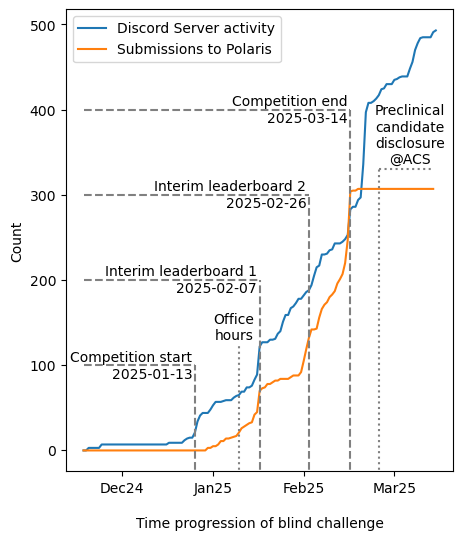

In [121]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns


fig, ax = plt.subplots(figsize=(5, 6))
sns.lineplot(data=counts, x="created_at_date", y="total", hue="Type", ax=ax)

ylim = ax.get_ylim()
xlim = ax.get_xlim()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=5))

t1 = mdates.date2num(np.datetime64('2025-01-13'))
t2 = mdates.date2num(np.datetime64('2025-02-07'))
t3 = mdates.date2num(np.datetime64('2025-02-26'))
t4 = mdates.date2num(np.datetime64('2025-03-14'))


for i, (t, s, y, d) in enumerate(zip(
    [t1, t2, t3, t4], ["Competition start", "Interim leaderboard 1", "Interim leaderboard 2", "Competition end"], [100, 200, 300, 400], ['2025-01-13', '2025-02-07', '2025-02-26', '2025-03-14']
)):
    ax.vlines(x=t, ymin=-100, ymax=y, color='gray', ls="--")
    ax.hlines(y=y, xmin=counts["created_at_date"][0], xmax=t, color='gray', ls="--")
    ax.text(
        x=mdates.date2num(np.datetime64(d))-1, 
        y=y+5, 
        s=s, 
        ha="right")
    ax.text(
        x=mdates.date2num(np.datetime64(d))-1, 
        y=y-15, 
        s=d, 
        ha="right")

# too messy
# # office hours
# t = mdates.date2num(np.datetime64('2025-01-30'))
# y = 150
# s= "Virtual\nOffice\nhours (3x)"
# d = '2025-01-30'
# ax.vlines(x=t, ymin=-100, ymax=y, color='green', ls="dotted")
# ax.hlines(y=y, xmin=t, xmax=counts["created_at_date"][len(counts)-1], color='green', ls="dotted")
# ax.text(
#     x=mdates.date2num(np.datetime64('2025-04-03'))+15, 
#     y=y+5, 
#     s=s, 
#     ha="center")
# ax.text(
#     x=mdates.date2num(np.datetime64('2025-04-03'))+15, 
#     y=y-15, 
#     s='2025-01-30/31', 
#     ha="center")
ax.vlines(x=mdates.date2num(np.datetime64('2025-01-30')), ymin=-100, ymax=125, color='gray', ls="dotted")
ax.text(
    x=mdates.date2num(np.datetime64('2025-01-30'))-2, 
    y=130, 
    s="Office\nhours", 
    ha="center")

# ACS disclosure
t = mdates.date2num(np.datetime64('2025-03-25'))
y = 330
s= "Preclinical\ncandidate\ndisclosure\n@ACS"
d = '2025-03-25'
ax.vlines(x=t, ymin=-100, ymax=y, color='gray', ls="dotted")
ax.hlines(y=y, xmin=t, xmax=counts["created_at_date"][len(counts)-1], color='gray', ls="dotted")
ax.text(
    x=mdates.date2num(np.datetime64(d))+12, 
    y=y+7, 
    s=s, 
    ha="center")
# ax.text( # doesn't fit
#     x=mdates.date2num(np.datetime64(d))+15, 
#     y=y-15, 
#     s=d, 
#     ha="center")
ax.get_legend().set_title('')

plt.ylim(ylim)

ax.set_xlabel("Time progression of blind challenge", labelpad=15)
ax.set_ylabel("Count")


plt.savefig("community_progression_lineplots.png", dpi=300)

The End.